In [2]:
#import something
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (16,9)
plt.style.use('ggplot')

In [3]:
#importing daata set
data= pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


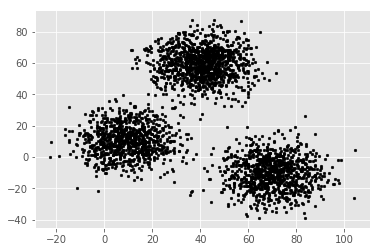

In [4]:
f1= data['V1'].values
f2= data['V2'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1,f2, c='black', s=7)

In [5]:
#Euclidean Distance
def dist(a,b, ax=1):
    return np.linalg.norm(a-b, axis=ax)

In [6]:
k=3
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C= np.array(list(zip(C_x,C_y)), dtype=np.float32)
C

array([[61., 29.],
       [57., 63.],
       [56., 27.]], dtype=float32)

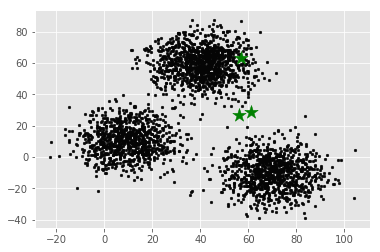

In [7]:
plt.scatter(f1,f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [10]:
C_old=np.zeros((C.shape))
#label
clusters = np.zeros(len(X))
error = dist(C,C_old, None)
while error !=0:
    for i in range(len(X)):
        distance=dist(X[i],C)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    #storing old centroid
    C_old=deepcopy(C)
    #finding the new centroid
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]==i]
        C[i]=np.mean(points,axis=0)
    error = dist(C,C_old,None)
clusters
C

array([[ 69.92419 , -10.119641],
       [ 40.683628,  59.715893],
       [  9.478045,  10.686052]], dtype=float32)

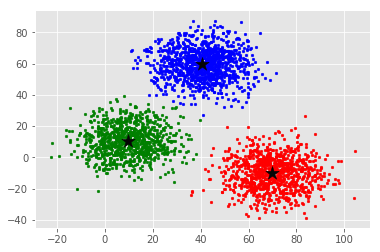

In [13]:
colors= ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')